## Initial Preparation

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importing all important libraries

In [9]:
# Importing Fast.ai libraries
from fastai.imports import *
from fastai.structured import *

# Importing Pandas and Sklearn libraries
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [8]:
path = "data/bluebook-for-bulldozers"

In [10]:
!dir "data/bluebook-for-bulldozers/"

 Volume in drive D is LENOVO
 Volume Serial Number is 7C94-5EA5

 Directory of D:\MyPortfolio\Blue_Book_For_Bulldozers\data\bluebook-for-bulldozers

10-Aug-19  08:41 PM    <DIR>          .
10-Aug-19  08:41 PM    <DIR>          ..
10-Aug-19  08:41 PM                43 .gitattributes
28-Apr-18  12:21 PM            11,063 Data Dictionary.xlsx
28-Apr-18  12:21 PM        51,498,702 Machine_Appendix.csv
28-Apr-18  12:21 PM           196,760 median_benchmark.csv
28-Apr-18  12:21 PM           211,941 random_forest_benchmark_test.csv
28-Apr-18  12:21 PM         3,560,907 Test.csv
24-Jan-13  04:08 PM       116,403,970 Train.csv
28-Apr-18  12:21 PM       119,791,159 TrainAndValid.csv
28-Apr-18  12:21 PM         3,318,969 Valid.csv
28-Apr-18  12:21 PM           323,524 ValidSolution.csv
              10 File(s)    295,317,038 bytes
               2 Dir(s)  500,464,713,728 bytes free


## Data Preparation

In [11]:
# Reading Dataset using pandas `read_csv`
%time df_raw = pd.read_csv(f"{path}/TrainAndValid.csv", low_memory = False, parse_dates = ['saledate'], infer_datetime_format = False)

Wall time: 1min 48s


In [12]:
%time df_raw = pd.read_csv(f"{path}/TrainAndValid.csv", low_memory = False, parse_dates = ['saledate'], infer_datetime_format = True)

Wall time: 12.4 s


Using Pandas to read csv file containing dataset. Using `infer_datetime_format` option in `read_csv` made parsing much faster, hence reducing significant reading time!

Usually `display` function don't allow to see all the rows and columns in a big dataset, it replaces middle values by ellipses. So, defining a function `display_all` to see all the rows and columns.

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [13]:
display_all(df_raw)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
5       1139255    26500.0    1001274     4605         121           3.0   
6       1139256    21000.0     772701     1937         121           3.0   
7       1139261    27000.0     902002     3539         121           3.0   
8       1139272    21500.0    1036251    36003         121           3.0   
9       1139275    65000.0    1016474     3883         121           3.0   
10      1139278    24000.0    1024998     4605         121           3.0   
11      1139282    22500.0     319906     5255         121           3.0   
12      1139283    36000.0    1052214     2232         121           3.0   
13      1139284    30500.0    1068082     3542         121           3.0   
14      1139290    28000.0    1058450     5162         121           3.0   
15      1139291    19000.0    1004810     4604         121           3.0   
16      1139292    13500.0    1026973     9510         121           3.0   
17      1139299     9500.0    1002713    21442         121           3.0   
18      1139301    12500.0     125790     7040         121           3.0   
19      1139304    11500.0    1011914     3177         121           3.0   
20      1139311    41000.0    1014135     8867         121           3.0   
21      1139333    34500.0     999192     3350         121           3.0   
22      1139344    26000.0    1044500     7040         121           3.0   
23      1139346    73000.0     821452       85         121           3.0   
24      1139348    33000.0     294562     3542         121           3.0   
25      1139351    12500.0     833838     7009         121           3.0   
26      1139354    15500.0     565440     7040         121           3.0   
27      1139356    53000.0    1004127    25458         121           3.0   
28      1139357    46000.0      44800    19167         121           3.0   
29      1139358    89000.0    1018076     1333         121           3.0   
30      1139363    51000.0     871201     1263         121           3.0   
31      1139365    14000.0     973717     9566         121           3.0   
32      1139367    31500.0    1036100     9109         121           3.0   
33      1139369    14000.0    1050658     1918         121           3.0   
34      1139379    18500.0      70214    13395         121           3.0   
35      1139382    10000.0    1068548      112         121           3.0   
36      1139390     8250.0    1011114     7110         121           3.0   
37      1139398    20500.0     138847     7043         121           3.0   
38      1139401     9500.0    1011478    18604         121           3.0   
39      1139409    51000.0     999090     3362         121           3.0   
40      1139412    39000.0     108090     1088         121           3.0   
41      1139413    58000.0    1045512     5853         121           3.0   
42      1139415    15500.0    1066239    17188         121           3.0   
43      1139418     7750.0    1026462     6270         121           3.0   
44      1139421    32000.0    1048704     2797         121           3.0   
45      1139423    11500.0     999442     3217         121           3.0   
46      1139424    12000.0    1011821     4818         121           3.0   
47      1139426    75000.0     625882    23937         121           3.0   
48      1139429     5500.0    1007166     7002         121           3.0   
49      1139432    28500.0     362075     1078         121           3.0   
50      1139445    35500.0    1066661    13776         121           3.0   
51      1139449    11500.0     115392     7014         1

In [14]:
df_raw.shape

(412698, 53)

This dataset have 412698 rows and 53 variables. It contains both Training(first 401125 rows) and Validation set.

Some basic statistical terms for all the variables, just for a rough look at the data.

In [15]:
display_all(df_raw.describe(include='all').T)

count unique  \
SalesID                   412698    NaN   
SalePrice                 412698    NaN   
MachineID                 412698    NaN   
ModelID                   412698    NaN   
datasource                412698    NaN   
auctioneerID              392562    NaN   
YearMade                  412698    NaN   
MachineHoursCurrentMeter  147504    NaN   
UsageBand                  73670      3   
saledate                  412698   4013   
fiModelDesc               412698   5059   
fiBaseModel               412698   1961   
fiSecondaryDesc           271971    177   
fiModelSeries              58667    123   
fiModelDescriptor          74816    140   
ProductSize               196093      6   
fiProductClassDesc        412698     74   
state                     412698     53   
ProductGroup              412698      6   
ProductGroupDesc          412698      6   
Drive_System              107087      4   
Enclosure                 412364      6   
Forks                     197715      2   
Pad_Type                   81096      4   
Ride_Control              152728      3   
Stick                      81096      2   
Transmission              188007      8   
Turbocharged               81096      2   
Blade_Extension            25983      2   
Blade_Width                25983      6   
Enclosure_Type             25983      3   
Engine_Horsepower          25983      2   
Hydraulics                330133     12   
Pushblock                  25983      2   
Ripper                    106945      4   
Scarifier                  25994      2   
Tip_Control                25983      3   
Tire_Size                  97638     17   
Coupler                   220679      3   
Coupler_System             44974      2   
Grouser_Tracks             44875      2   
Hydraulics_Flow            44875      3   
Track_Type                102193      2   
Undercarriage_Pad_Width   102916     19   
Stick_Length              102261     29   
Thumb                     102332      3   
Pattern_Changer           102261      3   
Grouser_Type              102193      3   
Backhoe_Mounting           80712      2   
Blade_Type                 81875     10   
Travel_Controls            81877      7   
Differential_Type          71564      4   
Steering_Controls          71522      5   

                                                                        top  \
SalesID                                                                 NaN   
SalePrice                                                               NaN   
MachineID                                                               NaN   
ModelID                                                                 NaN   
datasource                                                              NaN   
auctioneerID                                                            NaN   
YearMade                                                                NaN   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                            Medium   
saledate                                                2009-02-16 00:00:00   
fiModelDesc                                                            310G   
fiBaseModel                                                             580   
fiSecondaryDesc                                                           C   
fiModelSeries                                                            II   
fiModelDescriptor                                                         L   
ProductSize                                                          Medium   
fiProductClassDesc        Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...   
state                                                               Florida   
ProductGroup                                                            TEX   
ProductGroupDesc                                           Track Excavators   
Drive_System                                 

Changing the values of "SalePrice" variable to it's log because the marking criteria on Kaggle will judge on **RMSLE(Root Mean Square Log Error)**.

In [26]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [28]:
df_raw.SalePrice.head(10)

0    11.097410
1    10.950807
2     9.210340
3    10.558414
4     9.305651
5    10.184900
6     9.952278
7    10.203592
8     9.975808
9    11.082143
Name: SalePrice, dtype: float64

Date and time are very resourceful variable. It contains a lot of data which seems trivial but can be of huge value. For example, if a date is a weekend or not can be a significant thing for dependent variable(say Sales), but we(or our Random Forest) might not understand it's value. So, to make it easy for our Random forest to catch up on common trends defining a function `add_datepart` which will take out common properties(like 'Dayofyear', 'Is_month_start', 'Is_quarter_end') out of a date and make a differnt column out of it.

In [16]:
def add_datepart(df, fldname, drop=True, time=False, errors="raise"):   
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [17]:
# Adds many variables taking properties out of a date
add_datepart(df_raw, "saledate")

In [18]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


Our dataset looks pretty nice and resourceful but it will still show error when processed in a Random Forest because values in many variables are of type `string` which is just as readable as Japanese to me. So, we have to change all the string values in our dataset to some categorical numbers.

In [19]:
# strings to categories
for n, c in df_raw.items():
    if is_string_dtype(c): df_raw[n] = c.astype('category').cat.as_ordered()

In [20]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

Changing the order of categorical values in variable `UsageBand` to become more sensible.

In [21]:
df_raw.UsageBand.cat.set_categories(["High", "Medium","Low"], ordered = True, inplace = True)

In [22]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

Having a look at the fraction of null values in each variable. For many variables it is quite a significant fraction, so we have to something about these values as *NULL* values are invalid in Random Forest.

In [23]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.804428
Blade_Extension             0.937041
Blade_Type                  0.801610
Blade_Width                 0.937041
Coupler                     0.465277
Coupler_System              0.891024
Differential_Type           0.826595
Drive_System                0.740520
Enclosure                   0.000809
Enclosure_Type              0.937041
Engine_Horsepower           0.937041
Forks                       0.520921
Grouser_Tracks              0.891264
Grouser_Type                0.752378
Hydraulics                  0.200062
Hydraulics_Flow             0.891264
MachineHoursCurrentMeter    0.642586
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.803498
Pattern_Changer             0.752213
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.524851
Pushblock                   0.937041
Ride_Control                0.629928
Ripper                      0.740864
S

To make our data sensible we have to handle all the strings and null values. For strings we will just replace them with their categorical values. And, for null values we will replace them with the median value of the variable and we will create another boolean column named "variablename_na" having value `True` if the value was null for actual variable. For this we defined a function `proc_df` below:

In [24]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> x, y, nas = proc_df(df, 'col1')
    >>> x
       col2
    0     1
    1     2
    2     1
    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])
    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])
    >>>round(fit_transform!(mapper, copy(data)), 2)
    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

Adding appendix dataset to get more relevant variables which might help to make our prediction better!

In [26]:
%time df_appendix = pd.read_csv("data/bluebook-for-bulldozers/Machine_Appendix.csv", low_memory = False)

Wall time: 1.56 s


In [27]:
for n, c in df_appendix.items():
    if is_string_dtype(c): df_appendix[n] = c.astype('category').cat.as_ordered()

Joining the two datasets `df_raw` and `df_appendix` on common variable `MachineID`.

In [28]:
df_tmp = pd.merge(df_raw, df_appendix, on="MachineID", suffixes=('','_y'))

In [29]:
to_drop = df_tmp.filter(regex="_y$").columns

In [30]:
df_tmp = df_tmp.drop(columns=to_drop)

In [31]:
# Our final dataset with all the variables needed!
df_raw = df_tmp

In [35]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [37]:
df, y, nas = proc_df(df_raw, "SalePrice")

In [38]:
import os
os.makedirs("tmp", exist_ok=True)

Using Feather format to save the final dataset as it is quite fast compared to general formats like `csv`. This is the end of **Data Preparation** Section.

In [39]:
df_raw.to_feather("tmp/bulldozers_raw")

In [40]:
import feather
df_raw = feather.read_dataframe("tmp/bulldozers_raw")

In [44]:
display_all(df_raw)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246  11.097410     999089     3157         121           3.0   
1       1139248  10.950807     117657       77         121           3.0   
2       1139249   9.210340     434808     7009         121           3.0   
3       1398858   9.392662     434808     7009         132           2.0   
4       1398859   9.433484     434808     7009         132           2.0   
5       1139251  10.558414    1026470      332         121           3.0   
6       1139253   9.305651    1057373    17311         121           3.0   
7       1139255  10.184900    1001274     4605         121           3.0   
8       1139256   9.952278     772701     1937         121           3.0   
9       1175843  10.292146     772701     8323         121           3.0   
10      1139261  10.203592     902002     3539         121           3.0   
11      1139272   9.975808    1036251    36003         121           3.0   
12      1139275  11.082143    1016474     3883         121           3.0   
13      1139278  10.085809    1024998     4605         121           3.0   
14      1139282  10.021271     319906     5255         121           3.0   
15      1185515   8.987197     319906      328         121           3.0   
16      1139283  10.491274    1052214     2232         121           3.0   
17      1770625  10.819778    1052214     2232         132           3.0   
18      4359500  10.714418    1052214    23623         172           1.0   
19      1139284  10.325482    1068082     3542         121           3.0   
20      1139290  10.239960    1058450     5162         121           3.0   
21      1139291   9.852194    1004810     4604         121           3.0   
22      1139292   9.510445    1026973     9510         121           3.0   
23      1139299   9.159047    1002713    21442         121           3.0   
24      1139301   9.433484     125790     7040         121           3.0   
25      1139304   9.350102    1011914     3177         121           3.0   
26      1139311  10.621327    1014135     8867         121           3.0   
27      1139333  10.448715     999192     3350         121           3.0   
28      1139344  10.165852    1044500     7040         121           3.0   
29      1139346  11.198215     821452       85         121           3.0   
30      1139348  10.404263     294562     3542         121           3.0   
31      1139351   9.433484     833838     7009         121           3.0   
32      1139354   9.648595     565440     7040         121           3.0   
33      1139356  10.878047    1004127    25458         121           3.0   
34      1139357  10.736397      44800    19167         121           3.0   
35      1139358  11.396392    1018076     1333         121           3.0   
36      1139363  10.839581     871201     1263         121           3.0   
37      1139365   9.546813     973717     9566         121           3.0   
38      1139367  10.357743    1036100     9109         121           3.0   
39      1139369   9.546813    1050658     1918         121           3.0   
40      1139379   9.825526      70214    13395         121           3.0   
41      1139382   9.210340    1068548      112         121           3.0   
42      1139390   9.017968    1011114     7110         121           3.0   
43      1139398   9.928180     138847     7043         121           3.0   
44      1139401   9.159047    1011478    18604         121           3.0   
45      1139409  10.839581     999090     3362         121           3.0   
46      1139412  10.571317     108090     1088         121           3.0   
47      1139413  10.968198    1045512     5853         121           3.0   
48      1139415   9.648595    1066239    17188         121           3.0   
49      1139418   8.955448    1026462     6270         121           3.0   
50      1139421  10.373491    1048704     2797         121           3.0   
51      1139423   9.350102     999442     3217         1

## Modelling and Interpretation!

Dividing dataset into training and validation dataset for both X and y values.

In [45]:
X_train, X_valid = df[:401125].copy(), df[401125:].copy()
y_train, y_valid = y[:401125].copy(), y[401125:].copy()
raw_train, raw_valid = df_raw[:401125].copy(), df_raw[401125:].copy()

Just for parameter tuning, we don't need to run the whole randome forest on complete data. We can easily use a fraction of dataset on Random Forest and get fair amount of accuracy. Once we are sure about our tuning of hyperparameters, we can then run our forest on complete dataset for more accuracy.

So, defining a function `set_rf_samples` which will give `n` random rows to each tree in a forest.

In [47]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

In [48]:
set_rf_samples(50000)

Defining help function `rmse`(to calculate root mean square error) and `print_score`(to print a complete overview of the model)

In [49]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid), m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, "oob_score_"): res.append(m.oob_score_)
    print(res)

Making the first RandomForestRegressor with suitable hyperparameters! For `n_estimators`(number of trees), let's just start with small number like 20, to make processing faster. For `min_samples_leaf`(numbers of rows in leaf node) trying 3 as it can give sufficiently general results while not being too specific. For `max_features`(the fraction of columns to be considered while making a split), trying different values like `0.5`, `sqrt`, `log2`. Looking below, `0.5` fraction seems suitable.

In [50]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=3, max_features=0.5)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 4.62 s
[0.2088960482384185, 0.2518460803046068, 0.9093233982540555, 0.8835411244093968]


In [51]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=3, max_features='sqrt')
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 2.11 s
[0.2330185388648719, 0.2723698747132781, 0.8871722996236487, 0.8637864402120837]


In [52]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=3, max_features='log2')
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 2.02 s
[0.24428920800242407, 0.28333336308234314, 0.8759938140384663, 0.8525999489383529]


In [53]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=3, max_features=0.5)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 4.14 s
[0.2092330898164226, 0.25357543498876906, 0.9090305593992635, 0.8819362538846276]


In [55]:
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [56]:
reset_rf_samples()

#### Confidence on Predictions
Every tree in a forest make a different prediction from the input row. If there were many similar rows already in the training dataset, more predictions will be closer to each other. These predictions will have a smaller standard deviation(which means more confident prediction) than the predictions from rows not very common in the training set. So confidence on the prediction is inversely proportional to standard deviation of the predictions!

In [58]:
# Predictions by each tree in the forest
%time pred = np.stack([t.predict(X_valid) for t in m.estimators_])

Wall time: 667 ms


In [59]:
pred

array([[10.15228, 10.15228, 10.11847, ...,  9.28131,  9.28131,  9.28131],
       [10.13455, 10.21483, 10.13455, ...,  8.92266,  9.123  ,  9.4522 ],
       [10.32433, 10.32216, 10.32433, ...,  8.96288,  9.92859,  8.96288],
       ...,
       [10.22178, 10.22178, 10.22178, ...,  9.52871,  9.53255,  9.18071],
       [10.21483, 10.36879, 10.19182, ...,  9.30565,  9.7117 ,  9.7117 ],
       [10.21571, 10.33355, 10.15807, ...,  9.16224,  9.78376,  9.78376]])

In [60]:
# Actual predicition and its standard deviation of the first row
np.mean(pred[:, 0]), np.std(pred[:, 0])

(10.183328079777148, 0.09573962808265961)

Interpreting and Analysing the trend in a variable say `auctioneerID`

In [61]:
x = raw_valid.copy()
x['pred'] = np.mean(pred, axis=0)
x["pred_std"] = np.std(pred, axis=0)

Ploting the distribution of values in `auctioneerID` variable. It can be seen that `1.0` is far too many than any other number which can affect it's prediction power, we will talk about it soon.

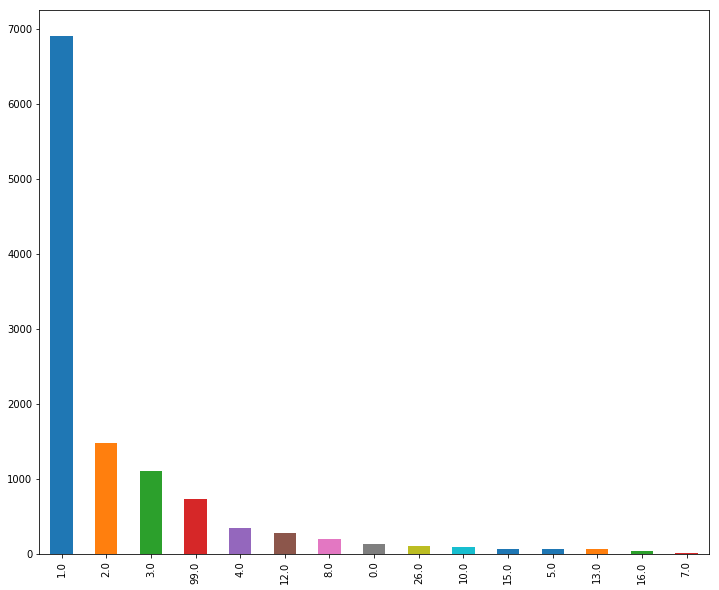

In [62]:
x.auctioneerID.value_counts().plot('bar', figsize=(12,10));

Grouping the dataset on `auctioneerID` and taking mean of `pred`, `pred_std` and `SalePrice` for each group. This will help analysing each group in more detail.

In [63]:
auc_summ = x[['auctioneerID', 'SalePrice', 'pred', 'pred_std']].groupby("auctioneerID", as_index= False).mean()

Each bar here represents the prediction of each group and the black line shows the standard deviation of each group. Smaller the black line, better the prediction power.

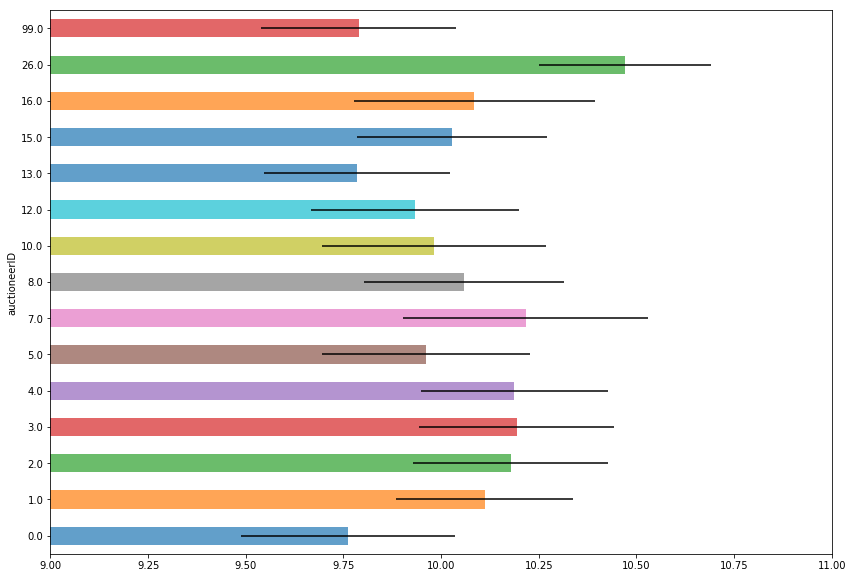

In [64]:
auc_summ.plot("auctioneerID", "pred", 'barh', alpha = 0.7, xerr="pred_std", legend=False, figsize=(14,10), xlim=(9,11));

In [65]:
auc_summ.sort_index(by="pred_std", ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


auctioneerID  SalePrice       pred  pred_std
6            7.0  10.239960  10.216268  0.313542
12          16.0  10.294037  10.085633  0.309424
8           10.0  10.048991   9.981615  0.286422
0            0.0   9.797139   9.761753  0.275041
5            5.0   9.967772   9.961881  0.266125
9           12.0   9.972637   9.933697  0.265432
7            8.0  10.044265  10.058851  0.256295
14          99.0   9.799985   9.789299  0.249601
3            3.0  10.210614  10.193603  0.249539
2            2.0  10.200073  10.178322  0.249312
11          15.0  10.057876  10.028124  0.242269
4            4.0  10.272910  10.187266  0.239738
10          13.0   9.759845   9.785113  0.237765
1            1.0  10.134294  10.111576  0.227074
13          26.0  10.522093  10.471935  0.220169

In the above table, it is easy to see that `1.0` has one of the lowest standard deviation which can be because of large number of rows with value `1.0`(which in turn helped to make better and more general predictions). Whereas the vlaue `7.0` seems to have the largest standard deviation which can be argued as the result of very less number of rows with value `7.0`(which in turn reduced forest's ability to make more generalised and better predictions)

### Feature Importance
One of the most important topic in Random Forest Models is feature importance which basically tells us which variable has most or least effect on the prediction. The algorithm to figure out importance is explained in simple words below.

First we make a RandomForestRegressor `m` normally using our variables and note the $r^2$. Then we choose a variable and shuffle it's values keeping all other values the same. We try to make prediction using the old Random Forest `m` with this new dataset, which gives us some $r^2$. Now we take a difference of this and the old $r^2$, and map this value to this variable. This value is used to rank the features. The more the difference, the more it is important for the good prediction.

In [66]:
def feat_imp(m, d):
    return pd.DataFrame({'col': d.columns, 'imp': m.feature_importances_}).sort_values('imp', ascending=False)

In [67]:
fi = feat_imp(m, df)

Looking at all the features with importance value more than 0.005.

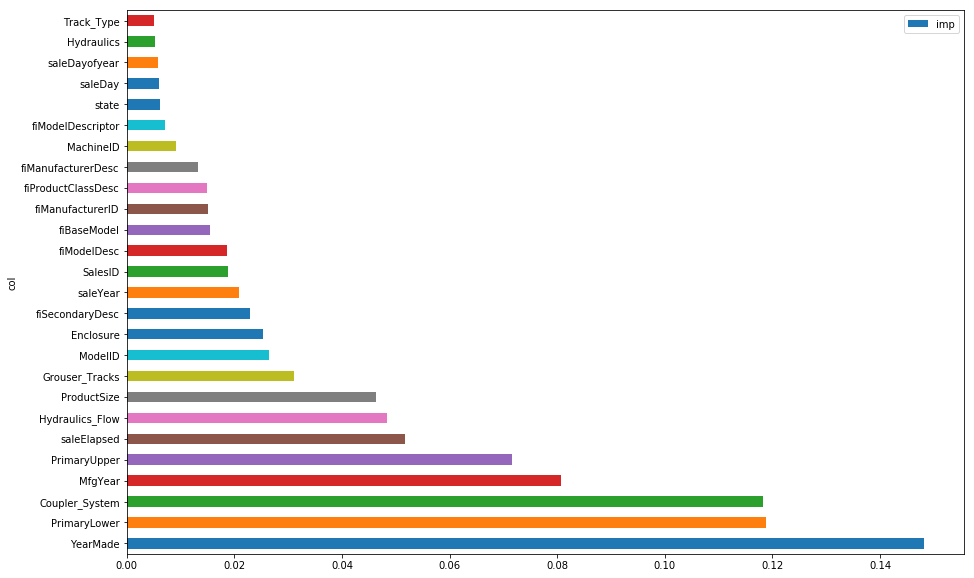

In [71]:
fi[fi.imp>0.005].plot("col", "imp", "barh", figsize=(15,10));

Noting all the columns above and removing all other columns which seems not very important.

In [72]:
to_keep = fi[fi.imp > 0.005].col.values; to_keep

array(['YearMade', 'PrimaryLower', 'Coupler_System', 'MfgYear', 'PrimaryUpper', 'saleElapsed',
       'Hydraulics_Flow', 'ProductSize', 'Grouser_Tracks', 'ModelID', 'Enclosure', 'fiSecondaryDesc',
       'saleYear', 'SalesID', 'fiModelDesc', 'fiBaseModel', 'fiManufacturerID', 'fiProductClassDesc',
       'fiManufacturerDesc', 'MachineID', 'fiModelDescriptor', 'state', 'saleDay', 'saleDayofyear',
       'Hydraulics', 'Track_Type'], dtype=object)

In [73]:
to_keep

array(['YearMade', 'PrimaryLower', 'Coupler_System', 'MfgYear', 'PrimaryUpper', 'saleElapsed',
       'Hydraulics_Flow', 'ProductSize', 'Grouser_Tracks', 'ModelID', 'Enclosure', 'fiSecondaryDesc',
       'saleYear', 'SalesID', 'fiModelDesc', 'fiBaseModel', 'fiManufacturerID', 'fiProductClassDesc',
       'fiManufacturerDesc', 'MachineID', 'fiModelDescriptor', 'state', 'saleDay', 'saleDayofyear',
       'Hydraulics', 'Track_Type'], dtype=object)

In [74]:
df_imp = df[to_keep]

In [75]:
df_imp

YearMade  PrimaryLower  Coupler_System  MfgYear  PrimaryUpper  \
0           2004         110.0               0   2004.0         120.0   
1           1996         150.0               0   1996.0         175.0   
2           2001        1351.0               1   2001.0        1601.0   
3           2001        1351.0               1   2001.0        1601.0   
4           2001        1351.0               1   2001.0        1601.0   
5           2001         225.0               0   2010.0         250.0   
6           2007        1601.0               1   2007.0        1751.0   
7           2004          14.0               0   2004.0          15.0   
8           1993           6.0               0   1999.0           8.0   
9           1999           6.0               0   1999.0           8.0   
10          2001          14.0               0   2001.0          15.0   
11          2008           3.0               0   2008.0           4.0   
12          1000         350.0               0   1987.0         500.0   
13          2004          14.0               0   2004.0          15.0   
14          1998          20.0               0   1998.0          75.0   
15          1000          20.0               0   1998.0          75.0   
16          1998          40.0               0   2000.0          50.0   
17          1998          40.0               0   2000.0          50.0   
18          2000          40.0               0   2000.0          50.0   
19          2001          14.0               0   2001.0          15.0   
20          2004          14.0               0   2004.0          15.0   
21          1999          14.0               0   1999.0          15.0   
22          1999           3.0               0   1999.0           4.0   
23          2003           4.0               0   2003.0           5.0   
24          2001           2.0               0   2001.0           3.0   
25          1991          14.0               0   1991.0          15.0   
26          2000          24.0               0   2000.0          28.0   
27          1000          45.0               0   1981.0         130.0   
28          2005           2.0               0   2005.0           3.0   
29          1996         200.0               0   1996.0         225.0   
...          ...           ...             ...      ...           ...   
412668      2006           8.0               0   2006.0          11.0   
412669      2006           8.0               0   2006.0          11.0   
412670      2002           8.0               0   2002.0          11.0   
412671      1000           2.0               0   2003.0           3.0   
412672      2005           2.0               0   2005.0           3.0   
412673      2005           2.0               0   2005.0           3.0   
412674      2002           2.0               0   2002.0           3.0   
412675      2004           3.0               0   2004.0           4.0   
412676      2004           3.0               0   2004.0           4.0   
412677      2004           3.0               0   2004.0           4.0   
412678      2004           3.0               0   2004.0           4.0   
412679      2004           3.0               0   2004.0           4.0   
412680      2004           3.0               0   2004.0           4.0   
412681      2005           3.0               0   2005.0           4.0   
412682      2005           3.0               0   2005.0           4.0   
412683      2005           3.0               0   2005.0           4.0   
412684      2005           3.0               0   2005.0           4.0   
412685      2005           3.0               0   2005.0           4.0   
412686      2005           3.0               0   2005.0           4.0   
412687      2006           3.0               0   2006.0           4.0   
412688      2006           3.0               0   2006.0           4.0   
412689      2006           3.0               0   2006.0           4.0   
412690      2006           5.0               0   2006.0           

Checking out model after removing irrelevant columns! This seems to be a better model.

In [76]:
X_train, X_valid = df_imp[:401125].copy(), df_imp[401125:].copy()

In [77]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=3, max_features=0.5)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 12 s
[0.12720370307417578, 0.23476145136255874, 0.9663771675852698, 0.8988057648270406]


#### Dendrogram Diagram
Using a Dendrogram diagram to see the relation between variables. If two variables are highly related then we can try to remove a irrelevant variable.

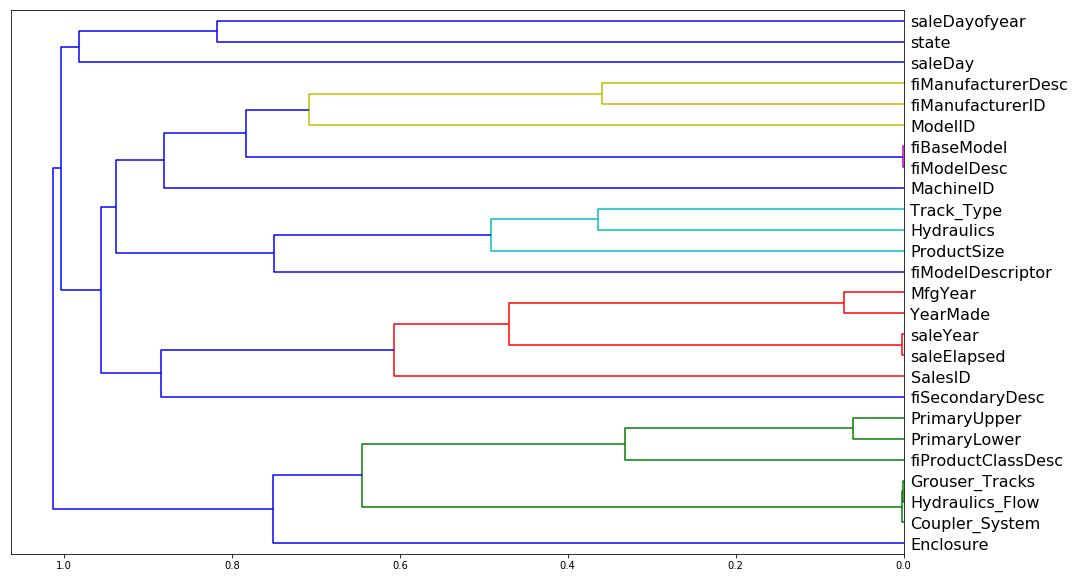

In [79]:
# Dendrogram time
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_imp).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method = 'average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_imp.columns, orientation='left', leaf_font_size=16)
plt.show()

After analysing the above dendrogram diagram, we can see that below variables are highly related:
1. `fiBaseModel` and `fiModelDesc`
2. `saleYear` and `saleElapsed`
3. `Hydraulics_Flow`, `Grouser_Tracks` and `Coupler_System`

In [80]:
# Defining a function get_oob() to get the oob_score_ of the dataset df
def get_oob(df):
    m = RandomForestRegressor(n_estimators = 20, min_samples_leaf=3, max_features=0.5, n_jobs = -1, oob_score=True)
    x = df[:401125].copy()
    m.fit(x, y_train)
    return m.oob_score_

Now we will try removing each of the above column and then see if it helps making our model better using oob_score(Out of Bag Score). Let's make a baseline score to compare our new models to.

In [81]:
get_oob(df_imp)
# Tomorrow - Drop below columns!

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.8832971386555716

In [82]:
for c in ('saleYear', 'saleElapsed', 'fiBaseModel', 'fiModelDesc', 'Hydraulics_Flow', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_imp.drop(c, axis=1)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


saleYear 0.8818870235109382


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


saleElapsed 0.8758316536650943


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fiBaseModel 0.8794506216188025


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fiModelDesc 0.8788751492364331


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Hydraulics_Flow 0.8865775798761826


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Grouser_Tracks 0.8810571659371591


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Coupler_System 0.8760613479786886


Above, we can see that removing column `Hydraulics_Flow` the `oob_score` got better. So, we will remove it.

In [85]:
df_imp.drop("Hydraulics_Flow", axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [87]:
X_train, X_valid = df_imp[:401125].copy(), df_imp[401125:].copy()
m = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=3, max_features=0.5)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 13.8 s
[0.12779354819669808, 0.23477865841923878, 0.9660646256631535, 0.8987909300341591]


In [88]:
# Trying the same model with 5 rows in leaf nodes, it seems to have worked out a bit better than before!
m = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=5, max_features=0.5)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 13 s
[0.1522489660875691, 0.2344489373196852, 0.9518336772701644, 0.8990750046877265]


### Tree Interpreter
Through Tree interpreter we can easily tell how much each variable affected the prediction of any row. It basically tracks the changes in the prediction during every split.

In [89]:
from treeinterpreter import treeinterpreter as ti

Analysing the prediction of the first row!

In [90]:
row = X_valid.values[None, 0]

In [91]:
prediction, bias, contributions = ti.predict(m, row)

Here, the `prediction` is the final prediction of the row using this Random Forest. The `bias` is the value from which the tree started, which basically means the average of all the values used to create that specific tree. The `contributions` is an array containing the changes made to the `bias` by every variable while splitting.

In [92]:
prediction[0], bias[0], contributions

(array([10.14304]),
 10.105901075142775,
 array([[ 0.22969, -0.08792,  0.06234,  0.12852, -0.09657, -0.02042, -0.03342,  0.03223, -0.0128 , -0.05485,
          0.0341 , -0.01245,  0.03661, -0.03745, -0.02075, -0.     , -0.02113, -0.00076,  0.01089, -0.0265 ,
         -0.00449, -0.01738, -0.01246, -0.0094 , -0.0285 ]]))

`np.argsort()` basically gives the indices of the data if it was sorted.

In [93]:
idxs = np.argsort(contributions[0])

Printing exactly what `contribution` was made by which column and it's value.

In [94]:
[o for o in zip(df_imp.columns[idxs], raw_valid[df_imp.columns.values].iloc[0][idxs], contributions[0])]

[('PrimaryUpper', 15.0, 0.22968924319959835),
 ('PrimaryLower', 14.0, -0.08791972853558602),
 ('Enclosure', 'OROPS', 0.062337410665505466),
 ('fiModelDesc', '310G', 0.1285150791003935),
 ('ProductSize', nan, -0.09656517838525716),
 ('Track_Type', nan, -0.020419452616474397),
 ('fiModelDescriptor', nan, -0.03342082928585066),
 ('fiProductClassDesc',
  'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
  0.032229516509725366),
 ('fiBaseModel', '310', -0.012799855312230778),
 ('saleElapsed', 1314144000, -0.054845785794281274),
 ('saleDay', 24, 0.034096180211979465),
 ('ModelID', 4605, -0.012448147754749162),
 ('saleDayofyear', 236, 0.036608788743139886),
 ('saleYear', 2011, -0.0374498383894597),
 ('Hydraulics', nan, -0.020748547409903662),
 ('state', 'Texas', -6.814849102809717e-07),
 ('fiManufacturerDesc', 'John Deere', -0.02113222561924353),
 ('fiManufacturerID', 43, -0.0007586857317886774),
 ('MachineID', 1823762, 0.010894101381075494),
 ('Grouser_Tracks', nan, -0.0264985122079

### Extrapolation

One of the few problems while using a Random Forest is **Extrapolation**. Because of it's inherent nature Random Forest is not capable of predicting something it has never seen. As we have dates in ascending order, while trying to input future dates in our forest can actually hamper it's prediction. Though we can't solve the issue of extrapolation completely as it is quite because of the nature of modelling but we can surely try to reduce it.

Below, I made a new column with value `1` in validation set and `0` in training set. Then I will try to make a prediction of this column using a Random Forest. Using feature importance of this model, we can easily point out the variables which are hampering the prediction because of significant difference in validation and training set.

In [96]:
df_ext = df_imp.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:401125] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
m = RandomForestRegressor(n_jobs = -1, n_estimators=40, min_samples_leaf=3, max_features=0.5, oob_score = True)
m.fit(x, y)
m.oob_score_

0.9071784608341216

In [98]:
fi = feat_imp(m, x); fi[:10]

col       imp
12           SalesID  0.344254
5        saleElapsed  0.262566
11          saleYear  0.183094
18         MachineID  0.105337
15  fiManufacturerID  0.021226
9          Enclosure  0.010338
8            ModelID  0.008242
22     saleDayofyear  0.008039
0           YearMade  0.007424
3            MfgYear  0.007081

In [99]:
feats = ["saleElapsed","SalesID", "saleYear"]

In [100]:
(X_train[feats]/1000000).describe()

saleElapsed        SalesID       saleYear
count  401125.000000  401125.000000  401125.000000
mean     1091.545636       1.906147       0.002004
std       181.841803       0.859338       0.000006
min       600.998400       1.139246       0.001989
25%       970.876800       1.418211       0.002000
50%      1143.072000       1.639270       0.002006
75%      1237.852800       2.242525       0.002009
max      1335.571200       6.333230       0.002012

In [101]:
(X_valid[feats]/1000000).describe()

saleElapsed       SalesID      saleYear
count  11573.000000  11573.000000  1.157300e+04
mean    1327.090569      5.650989  2.011709e-03
std        6.822708      1.540681  4.541738e-07
min     1308.700800      1.222837  2.011000e-03
25%     1323.820800      6.263425  2.011000e-03
50%     1329.091200      6.286565  2.012000e-03
75%     1332.374400      6.306650  2.012000e-03
max     1335.571200      6.333349  2.012000e-03

In the above description, we can see there is significant difference in these variables in validation and training dataset. If removing these columns in this model reduce the prediction accuracy then arguably removing these variables in our previous dataset might make our model better.

In [102]:
m = RandomForestRegressor(n_jobs = -1, n_estimators=40, min_samples_leaf=3, max_features=0.5, oob_score = True)
m.fit(x.drop(columns = ["saleElapsed", "SalesID", "saleYear"]), y)
m.oob_score_

0.6910003335241328

In [103]:
x.drop(columns=["saleElapsed", "SalesID", "saleYear"], inplace=True)

In [104]:
fi = feat_imp(m, x); fi[:10]

col       imp
15         MachineID  0.373690
19     saleDayofyear  0.198581
18           saleDay  0.095464
17             state  0.046589
12  fiManufacturerID  0.036284
0           YearMade  0.030966
7            ModelID  0.028570
10       fiModelDesc  0.027534
3            MfgYear  0.027350
11       fiBaseModel  0.022170

In [105]:
feats = ["saleElapsed", "SalesID", "MachineID", "saleDayofyear", "saleDay", "state"]

In [106]:
set_rf_samples(50000)

In [110]:
X_train, X_valid = df_imp[:401125].copy(), df_imp[401125:].copy()
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, min_samples_leaf=3, max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.21129916839026994, 0.25156001737003236, 0.9072251282282159, 0.8838055370796818]


Now we will remove each column in the above list `feats` and see it's effect on our main model.

In [111]:
for f in feats:
    df_subs = df_imp.drop(f, axis = 1)
    X_train, X_valid = df_subs[:401125].copy(), df_subs[401125:].copy()
    m = RandomForestRegressor(n_estimators=20, n_jobs = -1, min_samples_leaf=3, max_features=0.5)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

saleElapsed
[0.21492979987813912, 0.2531366215571015, 0.9040095437778856, 0.8823445200137091]
SalesID
[0.2126369211582141, 0.25051867741475126, 0.9060466785696774, 0.8847655266746673]
MachineID
[0.2105198033227309, 0.24993421731882554, 0.9079082558276771, 0.8853025835385049]
saleDayofyear
[0.21192966239844488, 0.2529603146223829, 0.906670641704551, 0.8825083544924766]
saleDay
[0.21089353377501122, 0.24944146509539686, 0.9075809893291938, 0.8857543959775775]
state
[0.2121803437919577, 0.2498714658190882, 0.9064497215153722, 0.8853601709424125]


Seems like removing `SalesID`, `MachineID`, `saleDay` and `state` can have positive effect on our model!

In [112]:
df_subs = df_imp.drop(["MachineID", "state", "saleDay", "SalesID"], axis=1)
X_train, X_valid = df_subs[:401125].copy(), df_subs[401125:].copy()
m = RandomForestRegressor(n_estimators=20, n_jobs = -1, min_samples_leaf=3, max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.21184541489529093, 0.24871713309894944, 0.9067448286068699, 0.88641692895711]


In [114]:
reset_rf_samples()

In [358]:
m = RandomForestRegressor(n_estimators=40, n_jobs = -1, min_samples_leaf=3, max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.13163543056774016, 0.23052830980105898, 0.963993543459304, 0.9024222649875313]


In [359]:
m = RandomForestRegressor(n_estimators=160, n_jobs = -1, min_samples_leaf=3, max_features=0.5)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 19s
[0.12994957098566315, 0.2286428297270689, 0.9649099095817499, 0.904011904800351]


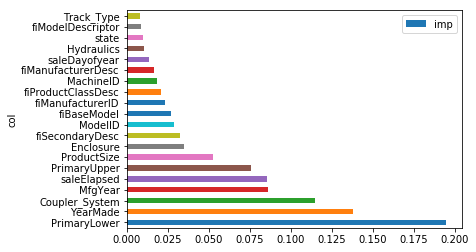

In [364]:
feat_imp(m, X_train).plot('col', 'imp', 'barh')

In [367]:
X_train, X_valid = df_imp[:401125].copy(), df_imp.drop(columns='PrimaryLower')[401125:].copy()
m = RandomForestRegressor(n_estimators=40, n_jobs = -1, min_samples_leaf=3, max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.12585993703986437, 0.23289314587536275, 0.9670837912817664, 0.9004100268328393]
